In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, Input
from keras import models
from keras.models import Model
from keras.utils.vis_utils import plot_model

In [2]:
test_data = 'test'
train_data = 'train'

In [3]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [4]:
train_set = train_datagen.flow_from_directory(train_data,
                    target_size = (48,48),
                    batch_size = 32,
                    color_mode = 'grayscale',
                    shuffle = True,
                    class_mode = 'categorical')

Found 14407 images belonging to 10 classes.


In [5]:
test_set = test_datagen.flow_from_directory(test_data,
                    target_size = (48,48),
                    batch_size = 32,
                    color_mode = 'grayscale',
                    shuffle = True,
                    class_mode = 'categorical')

Found 3602 images belonging to 10 classes.


In [6]:
input_img = Input(shape=(48,48,1))

### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

In [7]:
flat_1 = Flatten()(mid_1)

dense_1 = Dense(1200, activation='relu')(flat_1)
dense_2 = Dense(600, activation='relu')(dense_1)
dense_3 = Dense(150, activation='relu')(dense_2)
output = Dense(10, activation='softmax')(dense_3)

In [8]:
model = Model([input_img], output)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
hist = model.fit(train_set, steps_per_epoch=100, epochs=20, validation_data=test_set, validation_steps=100)

Epoch 1/20
100/100 [==============================] - 7s 74ms/step - loss: 51.8297 - accuracy: 0.7362 - val_loss: 6.0578 - val_accuracy: 0.8037
Epoch 2/20
100/100 [==============================] - 7s 70ms/step - loss: 2.9132 - accuracy: 0.8981 - val_loss: 1.4612 - val_accuracy: 0.9244
Epoch 3/20
100/100 [==============================] - 7s 68ms/step - loss: 1.2937 - accuracy: 0.9331 - val_loss: 1.0294 - val_accuracy: 0.9344
Epoch 4/20
100/100 [==============================] - 7s 68ms/step - loss: 0.6879 - accuracy: 0.9450 - val_loss: 0.9024 - val_accuracy: 0.9406
Epoch 5/20
100/100 [==============================] - 7s 68ms/step - loss: 0.6397 - accuracy: 0.9519 - val_loss: 0.8354 - val_accuracy: 0.9397
Epoch 6/20
100/100 [==============================] - 7s 67ms/step - loss: 0.6687 - accuracy: 0.9469 - val_loss: 1.0135 - val_accuracy: 0.9156
Epoch 7/20
100/100 [==============================] - 7s 70ms/step - loss: 0.4156 - accuracy: 0.9591 - val_loss: 0.3887 - val_accuracy: 0.962

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 10)   20          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 48, 48, 10)   20          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 48, 48, 1)    0           input_1[0][0]                    
_______________________________________________________________________________________

In [12]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


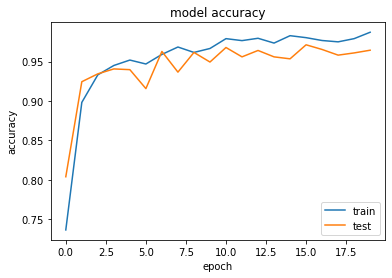

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

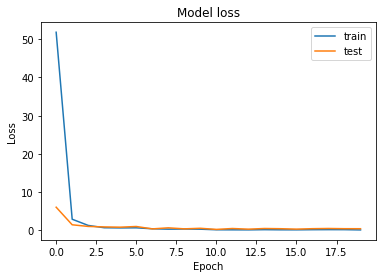

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [15]:
img = keras.preprocessing.image.load_img("30213.jpg",color_mode = 'grayscale', target_size=(48,48,1))  ##image for 3

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score1 = predictions[0]
print(score1)

[7.8136983e-21 8.9801586e-17 1.7120331e-22 9.9999988e-01 6.8822091e-30
 4.5539274e-32 7.9432655e-19 1.5187982e-07 8.6690686e-26 1.6634684e-27]


In [16]:
img = keras.preprocessing.image.load_img("70405.jpg", color_mode = 'grayscale', target_size=(48,48,1))  ##image for 7

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(score)                      

[1.1550408e-20 6.4151683e-23 2.8512109e-32 9.1893314e-17 0.0000000e+00
 7.9732077e-32 2.8619413e-19 1.0000000e+00 0.0000000e+00 0.0000000e+00]
